In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

In [4]:
np.random.seed(1)

# create a data frame with columns x1, x2 and x3
df = pd.DataFrame({
    'x1': np.random.normal(0, 2, 10000),
    'x2': np.random.normal(5, 3, 10000),
    'x3': np.random.normal(-5, 5, 10000)
})

In [5]:
df.head()

,x1,x2,x3
0,3.248691,4.632578,-14.657819
1,-1.223513,5.684509,-5.802131
2,-1.056344,3.943085,-9.161098
3,-2.145937,2.508340,-6.030558
4,1.730815,4.216731,0.131275


In [6]:
df.describe()

,x1,x2,x3
count,10000.000000,10000.000000,10000.000000
mean,0.019545,5.028306,-5.073018
std,1.997672,3.003718,4.979994
min,-7.312880,-5.354209,-26.165824
25%,-1.325850,2.983117,-8.432691
50%,0.016908,5.056408,-5.087269
75%,1.343618,7.066050,-1.785300
max,8.053698,17.504353,13.298829


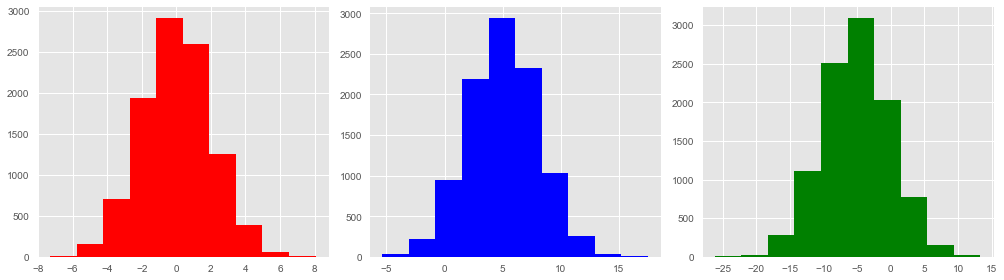

In [13]:
x1_plot = df['x1']
x2_plot = df['x2']
x3_plot = df['x3']

fig, ax = plt.subplots(1,3, figsize=(14,4))

ax[0].hist(x1_plot, color ='r')
ax[1].hist(x2_plot, color ='b')
ax[2].hist(x3_plot, color ='g')

fig.tight_layout()
plt.show()

In [25]:
from scipy import stats
np.random.seed(12345678)
x = df['x1']
y = df['x2']
z = df['x3']
print(stats.shapiro(x))
print(stats.shapiro(y))
print(stats.shapiro(z))

(0.9998146891593933, 0.585325300693512)
(0.9998764991760254, 0.9034109711647034)
(0.9998255968093872, 0.6470890641212463)


C:\Users\renee\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1310: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
# create the standard scaler object
scaler = preprocessing.StandardScaler()

# fit the scaler with the data frame
scaled_df = scaler.fit_transform(df)

# create a new scaled data frame with the same columns 
scaled_df = pd.DataFrame(scaled_df, columns=['x1', 'x2', 'x3'])

In [26]:
scaled_df.describe()

,x1,x2,x3
count,1.000000e+04,1.000000e+04,1.000000e+04
mean,1.203482e-17,2.343653e-16,1.831368e-16
std,1.000050e+00,1.000050e+00,1.000050e+00
min,-3.670670e+00,-3.456727e+00,-4.235720e+00
25%,-6.735153e-01,-6.809200e-01,-6.746676e-01
50%,-1.320206e-03,9.356210e-03,-2.861949e-03
75%,6.628410e-01,6.784411e-01,6.602180e-01
max,4.021960e+00,4.153742e+00,3.689314e+00


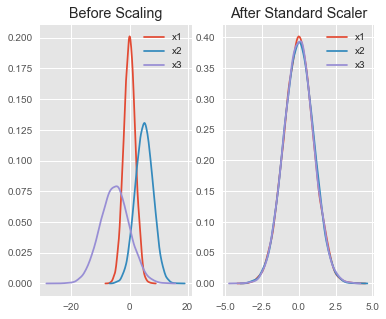

In [27]:
# define the subplot with two plots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

# before scaling plot setup
ax1.set_title('Before Scaling')
sns.kdeplot(df['x1'], ax=ax1)
sns.kdeplot(df['x2'], ax=ax1)
sns.kdeplot(df['x3'], ax=ax1)

# after scaling plot setup
ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_df['x1'], ax=ax2)
sns.kdeplot(scaled_df['x2'], ax=ax2)
sns.kdeplot(scaled_df['x3'], ax=ax2)

# show both plots
plt.show()